# Classification with Decision Trees

In this lab session, *Classification with decision Trees* is what has been analyzed. In order to do so, **Scikit-Learn** needs to be introduced. It is a package that provides:
 - efficient versions of a large number of common algorithms
 - a clean, uniform, and streamlined API
 - very useful and complete online documentation

We are going to go through:
 - an *Introduction* to Scikit-Learn
 - a *Data representation* in Scikit-Learn
 - an *Estimator* API
 - some examples 

## Data Representation
Data can be represented exploiting a two-dimensional grid:
- rows represent individual elements of the data-set
- columns represent quantities related to each of these elements

In [36]:
import seaborn as sns
import pandas as pd

In [37]:
# Import the dataset
df = pd.read_csv('iris.csv', header = None)

In [38]:
# Inspect the dataset
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


As we can see, the dataset does not present column names. We can solve this issue in the following way.

In [39]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Rows represent single observed flowers.
Columns refer to a piece of information that describe each sample.

In this case, the *features*, called x, are all the columns except the last one, named 'species', since we refer to it as *target*, also called y.

*Seaborn* is what we use to visualize the data.

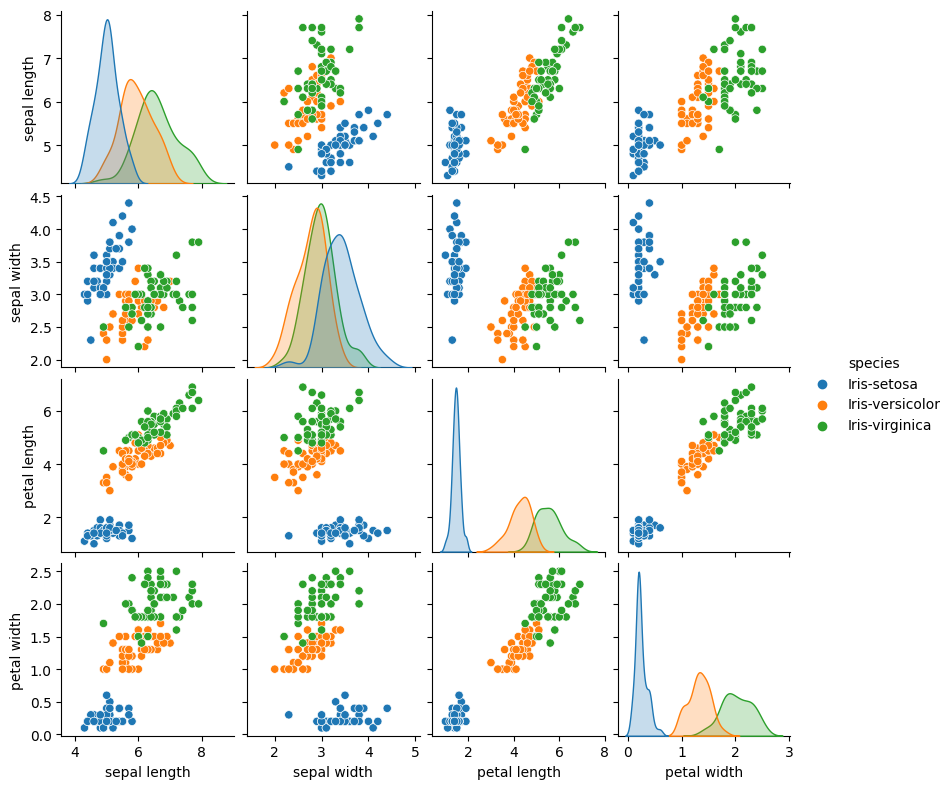

In [40]:
# Prepare the environment for plotting information on the dataset.
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(df, hue = 'species', height = 2);

Exploiting Scikit-Learn we can extract the feature matrix and the target array from the DataFrame.

Store in X the content fo the iris.csv, excluding the column 'species', and in the y the column 'species'.

In [41]:
X = df.drop('species', axis = 1)

y = df['species']

# And verify the shapes
print(f'Feature matrix shape: {X.shape}')
print(f'Target array shape: {y.shape}')

Feature matrix shape: (150, 4)
Target array shape: (150,)


## Hyperparameters

The *parameters* are what the ML algorithms learn from the data , and are used at run time by the algorithms implementing the tasks to perform at the best on data similar to those used during learning. 
The *hyperparameters*, instead, are those that cannot be directly learned from the data, but are chosen before the learning process.







What is **Estimator API**?

It is one of the main APIs implemented by Scikit-learn. It provides a consistent interface for a wide range of ML applications that's why all machine learning algorithms in Scikit-Learn are implemented via Estimator API. The object that learns from the data (fitting the data) is an estimator.

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
    - or in the first attempt use the default values
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Supervised learning example

Given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use the _Decision Tree_ algorithm, with the standard parameter values.
We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
1. Import the method `train_test_split` from `sklearn.model_selection`<br>
2. Generate the variables `Xtrain, Xtest, ytrain, ytest` by calling the function `train_test_split` with parameters `X` and `y`, and the additional parameter `random_state = 1`<br>

In [42]:
# In order to evaluate the model on data whcih it has not seen before,
# a split can be done, into training set and test set.

#Split arrays or matrices into random train and test subsets.

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)

# Shape the resulting variables
print(f'The shape of Xtrain is: {Xtrain.shape}')
print(f'The shape of Xtest is: {Xtest.shape}')
print(f'The shape of ytrain is: {ytrain.shape}')
print(f'The shape of ytest is: {ytest.shape}')

The shape of Xtrain is: (112, 4)
The shape of Xtest is: (38, 4)
The shape of ytrain is: (112,)
The shape of ytest is: (38,)


Now, we can predict the labels, as follows:

1. choose the model class, it will be `DecisionTreeClassifier`, imported from `sklearn.tree`<br>
2. instantiate the `model` as a `DecisionTreeClassifier` without any hyperparameter, we will use the defaults<br>
3. fit the `model` to data, calling its method `fit` with parameters `Xtrain, ytrain`<br>
4. predict the target `ytrain_model` using the `predict` method of `model` on the `Xtrain` data

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(Xtrain, ytrain)
ytrain_model = model.predict(Xtrain)

We can use the ``accuracy_score`` utility to see the fraction of predicted training set labels that match their true value.

In [51]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(ytrain, ytrain_model)
print('The accuracy on the training set is {0:.2f}%'.format(accuracy_train * 100))

The accuracy on the training set is 100.00%


Finally, we can predict the new target and compute the accuracy on the test set.

In [52]:
ytest_model = model.predict(Xtest)
accuracy_test = accuracy_score(ytest, ytest_model)
print('The accuracy on the test set is {0:.2f}%'.format(accuracy_test * 100))

The accuracy on the test set is 97.37%


## Decision Tree
Now, we can show the **Decision Tree**.

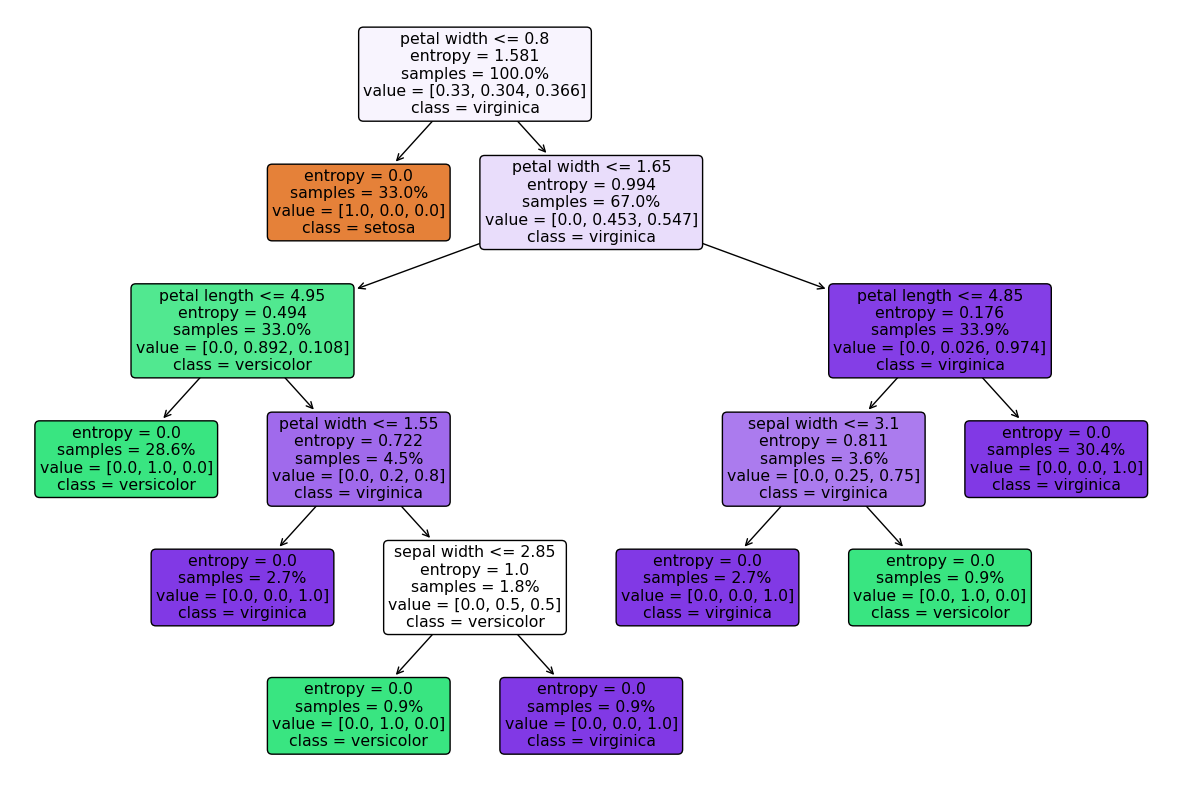

In [53]:
# A few imports

from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
figure(figsize = (15, 10))
plot_tree(model, 
          filled = True, 
          feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'], 
          class_names = ['setosa', 'versicolor', 'virginica'],
          rounded = True, 
          proportion = True);